In [3]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import os

# Ensure models directory exists
os.makedirs("models", exist_ok=True)

# Load dataset
df = pd.read_csv("data/mydata.csv")

# Define features and target
features = [
    "profile pic", "nums/length username", "fullname words", "nums/length fullname",
    "name==username", "description length", "external URL", "private",
    "#posts", "#followers", "#follows"
]
target = "fake"

X = df[features]
y = df[target]

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model and scaler
joblib.dump(model, "models/random_forest_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model trained and saved! Accuracy: {accuracy:.2f}")

✅ Model trained and saved! Accuracy: 0.91


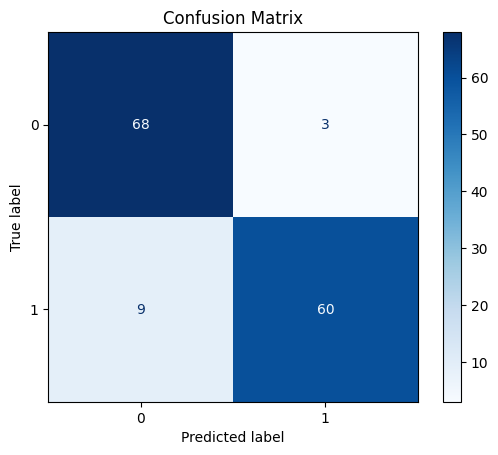

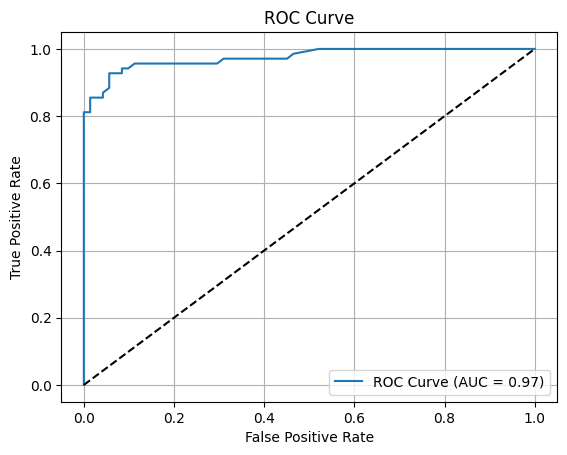

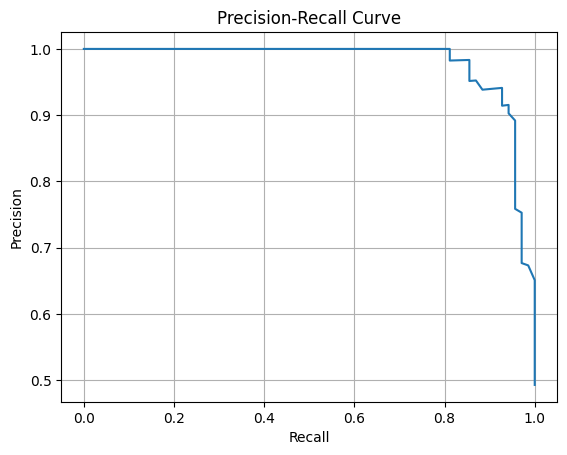

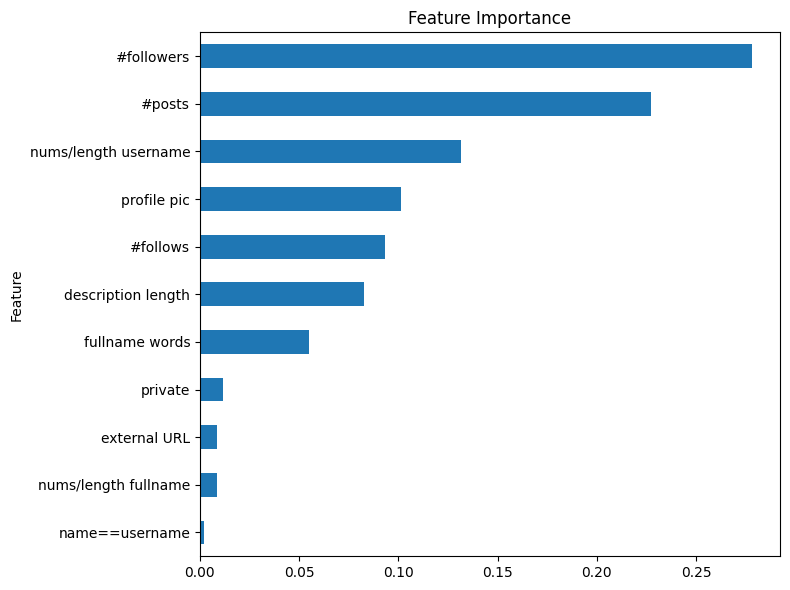

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("data/mydata.csv")

# Define features and target
features = [
    "profile pic", "nums/length username", "fullname words", "nums/length fullname",
    "name==username", "description length", "external URL", "private",
    "#posts", "#followers", "#follows"
]
target = "fake"

X = df[features]
y = df[target]

# Scale features
scaler = joblib.load("models/scaler.pkl")
X_scaled = scaler.transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Load model
model = joblib.load("models/random_forest_model.pkl")

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class '1' (fake)

# -------------------------------------
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# -------------------------------------
# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------
# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

# -------------------------------------
# 4. Feature Importance
importances = model.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=True)

feat_df.plot(kind="barh", x="Feature", y="Importance", legend=False, figsize=(8, 6), title="Feature Importance")
plt.tight_layout()
plt.show()


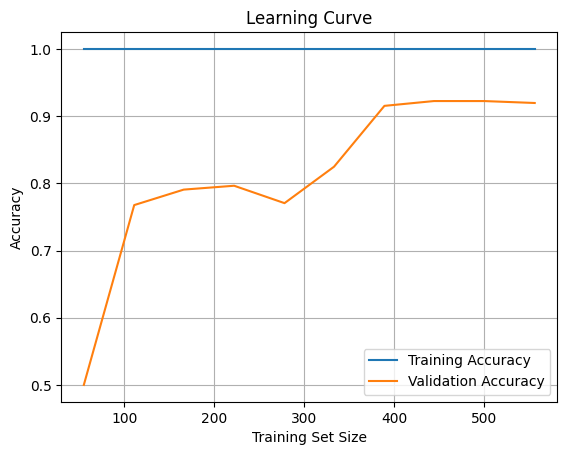

In [2]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()


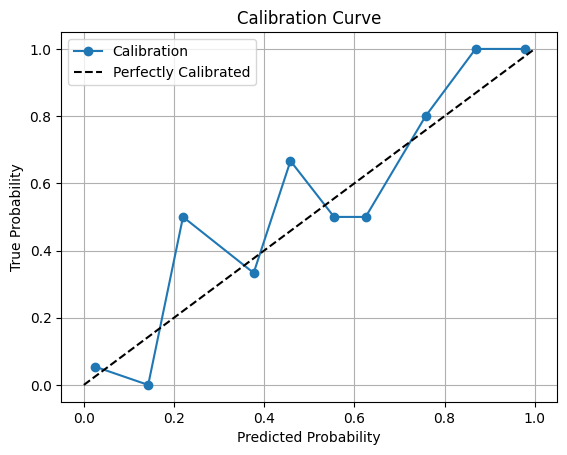

In [3]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label="Calibration")
plt.plot([0, 1], [0, 1], 'k--', label="Perfectly Calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.grid(True)
plt.show()


Training model with varying dataset sizes...
Training Size: 100, Accuracy: 88.57%
Training Size: 150, Accuracy: 91.43%
Training Size: 201, Accuracy: 92.86%
Training Size: 252, Accuracy: 92.86%
Training Size: 302, Accuracy: 92.14%
Training Size: 353, Accuracy: 91.43%
Training Size: 404, Accuracy: 92.86%
Training Size: 454, Accuracy: 90.71%
Training Size: 505, Accuracy: 90.71%
Training Size: 556, Accuracy: 91.43%
✅ Final model trained and saved!


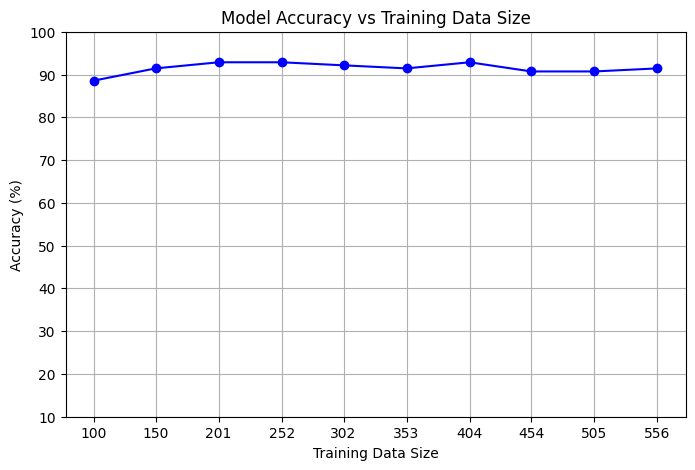

In [7]:
import pandas as pd
import joblib
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Ensure models directory exists
os.makedirs("models", exist_ok=True)

# Load dataset
df = pd.read_csv("data/mydata.csv")

# Define features and target
features = [
    "profile pic", "nums/length username", "fullname words", "nums/length fullname",
    "name==username", "description length", "external URL", "private",
    "#posts", "#followers", "#follows"
]
target = "fake"

X = df[features]
y = df[target]

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Track accuracy over different dataset sizes
train_sizes = np.linspace(100, len(X_train), 10, dtype=int)  # 10 sizes from 100 to max
accuracies = []

print("Training model with varying dataset sizes...")
for size in train_sizes:
    # Take a subset of the training data
    X_partial = X_train[:size]
    y_partial = y_train[:size]
    
    model.fit(X_partial, y_partial)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy * 100)
    print(f"Training Size: {size}, Accuracy: {accuracy * 100:.2f}%")

# Save the final model
model.fit(X_train, y_train)
joblib.dump(model, "models/random_forest_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
print("✅ Final model trained and saved!")

# Plot Accuracy vs Training Data Size
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, accuracies, marker="o", linestyle="-", color="blue")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy vs Training Data Size")
plt.grid(True)

# Customize X and Y axis
plt.xticks(train_sizes)
plt.yticks(np.arange(10, 110, 10))  # 10% to 100%
plt.show()


In [3]:
import pandas as pd
import numpy as np

# Creating a sample dataframe with missing values
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', np.nan],
        'Age': [25, np.nan, 30, 22, 35],
        'Salary': [50000, np.nan, np.nan, 42000, 48000]}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob   NaN      NaN
2  Charlie  30.0      NaN
3    David  22.0  42000.0
4      NaN  35.0  48000.0


In [4]:
print(df.isnull())  # Boolean DataFrame indicating missing values
print(df.isnull().sum())  # Count of missing values in each column

    Name    Age  Salary
0  False  False   False
1  False   True    True
2  False  False    True
3  False  False   False
4   True  False   False
Name      1
Age       1
Salary    2
dtype: int64


In [6]:
#Drop rows with missing values
df_cleaned = df.dropna()
print(df_cleaned)
#Drop columns with missing values
df_cleaned = df.dropna(axis=1)
print(df_cleaned)


    Name   Age   Salary
0  Alice  25.0  50000.0
3  David  22.0  42000.0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [9]:
df_filled = df.fillna(0)
print(df_filled)
#Fill with column mean, median and mode
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Mean
df['Salary'].fillna(df['Salary'].median(), inplace=True)  # Median
df['Name'].fillna(df['Name'].mode()[0], inplace=True)  # Mode
print(df)

      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  28.0  48000.0
2  Charlie  30.0  48000.0
3    David  22.0  42000.0
4    Alice  35.0  48000.0
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  28.0  48000.0
2  Charlie  30.0  48000.0
3    David  22.0  42000.0
4    Alice  35.0  48000.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_19596\1885062553.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # Mean
C:\Users\DELL\AppData\Local\Temp\ipykernel_19596\1885062553.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [11]:
#Forward fill (propagates previous values #forward)
df_ffill = df.fillna(method='ffill')
print(df_ffill)

#Backward fill (propagates next value #backward)
df_ffill = df.fillna(method='bfill')
print(df_ffill)


      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  28.0  48000.0
2  Charlie  30.0  48000.0
3    David  22.0  42000.0
4    Alice  35.0  48000.0
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  28.0  48000.0
2  Charlie  30.0  48000.0
3    David  22.0  42000.0
4    Alice  35.0  48000.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_19596\812680459.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
C:\Users\DELL\AppData\Local\Temp\ipykernel_19596\812680459.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='bfill')
